In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('HR_comma_sep.csv.txt',sep=',')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.shape

(14999, 10)

In [4]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
data.drop_duplicates()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


### Observation:

1. here left is dependent/target variable
2. target variable is 0 and 1 so we use Logistic Regression algorithm
3. sales, last evaluation and work accident doesnt correlate with the rate of leaving the office

- drop unneccessary column

In [6]:
data = data.drop(['last_evaluation','Work_accident','sales'], axis=1)
data.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,salary
0,0.38,2,157,3,1,0,low
1,0.80,5,262,6,1,0,medium
2,0.11,7,272,4,1,0,medium
3,0.72,5,223,5,1,0,low
4,0.37,2,159,3,1,0,low


- apply feature encoding (one-hot encoding) on text data

In [7]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
dic1 = {'low':0,'medium':1,'high':2}
dic1

{'low': 0, 'medium': 1, 'high': 2}

In [9]:
data['salary'] = data['salary'].replace(dic1)
data.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,salary
0,0.38,2,157,3,1,0,0
1,0.80,5,262,6,1,0,1
2,0.11,7,272,4,1,0,1
3,0.72,5,223,5,1,0,0
4,0.37,2,159,3,1,0,0


<AxesSubplot:>

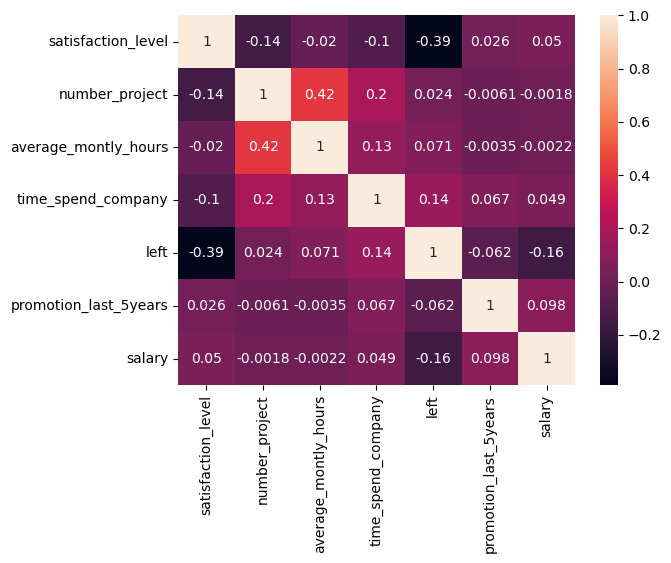

In [10]:
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='left', ylabel='promotion_last_5years'>

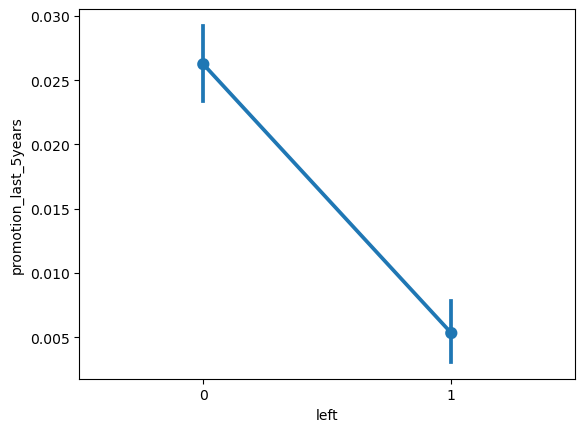

In [11]:
sns.pointplot(data['left'],data['promotion_last_5years'])

<AxesSubplot:xlabel='salary', ylabel='left'>

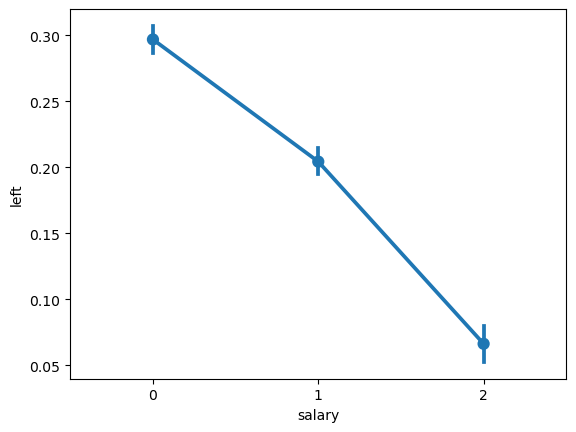

In [12]:
sns.pointplot(data['salary'],data['left'])

In [ ]:
### Apply ML algorithm

- separate x and y data

In [14]:
x= data.drop('left', axis=1)
y= data['left']

- split data into train and test set

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [18]:
lr.fit(x_train,y_train)

LogisticRegression()

- prediction on x_test data

In [19]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

- accuracy score

In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7723333333333333

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=5)

array([0.782     , 0.78533333, 0.79      , 0.776     , 0.61853951])

In [ ]:
1st acuracy = 78.2% 2nd accuracy = 78.5% 3rd accuracy = 79% 4th accuracy = 77% 5th accuracy = 61%

Out of all 5 accuracies 3rd accuracy is the highest hence the 3rd train and test set is the best split.